## Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from read_co2 import read_co2

Having imported all necessary modules, we now begin to derive the values for the chi_square_fit test fitted to a polynomial of degree two. The new chi-squared function we must minimize is therefore:

$$\chi^{2} (a, b, c) = \sum_{i = 0}^{n - 1} \biggl( \frac{y_{i} - a - b x_{i} - c x_{i}^{2}}{\sigma_{i}} \biggr)^{2}$$

When minimized with respect to its arguments, the chi-square equation given above yields the following three partial derivatives:

$$\frac{\partial \chi^{2}}{\partial a} = \sum_{i = 0}^{n - 1} \frac{-2}{\sigma_{i}^{2}} (y_{i} - a - b x_{i} - c x_{i}^{2}) = 0$$

$$\frac{\partial \chi^{2}}{\partial b} = \sum_{i = 0}^{n - 1} \frac{-2 x_{i}}{\sigma_{i}^{2}} (y_{i} - a - b x_{i} - c x_{i}^{2}) = 0$$

$$\frac{\partial \chi^{2}}{\partial c} = \sum_{i = 0}^{n - 1} \frac{-2 x_{i}^{2}}{\sigma_{i}^{2}} (y_{i} - a - b x_{i} - c x_{i}^{2}) = 0$$

These three equations can be rearranged to give:

$$\sum_{i} \frac{y_{i}}{\sigma_{i}^{2}} - a \sum_{i} \frac{1}{\sigma_{i}^{2}} - b \sum_{i} \frac{x_{i}}{\sigma_{i}^{2}} - c \sum_{i} \frac{x_{i}^{2}}{\sigma_{i}^{2}} = 0$$

$$\sum_{i} \frac{x_{i} y_{i}}{\sigma_{i}^{2}} - a \sum_{i} \frac{x_{i}}{\sigma_{i}^{2}} - b \sum_{i} \frac{x^{2}_{i}}{\sigma_{i}^{2}} - c \sum_{i} \frac{x_{i}^{3}}{\sigma_{i}^{2}} = 0$$

$$\sum_{i} \frac{x^{2}_{i} y_{i}}{\sigma_{i}^{2}} - a \sum_{i} \frac{x^{2}_{i}}{\sigma_{i}^{2}} - b \sum_{i} \frac{x^{3}_{i}}{\sigma_{i}^{2}} - c \sum_{i} \frac{x_{i}^{4}}{\sigma_{i}^{2}} = 0$$

Next, we use the substitutions $S = \sum 1 / \sigma^{2}$, $S_{y} = \sum y / \sigma^{2}$, $S_{xy} = \sum xy / \sigma^{2}$, $S_{xxy} = \sum x^{2}y / \sigma^{2}$, $S_{x} = \sum x / \sigma^{2}$, $S_{xx} = \sum x^{2} / \sigma^{2}$, $S_{xxx} = \sum x^{3} / \sigma^{2}$, and $S_{xxxx} = \sum x^{4} / \sigma^{2}$ in order to simplify our equations to:

$$S_{y} - aS - bS_{x} -cS_{xx} = 0$$

$$S_{xy} - aS_{x} - bS_{xx} -cS_{xxx} = 0$$

$$S_{xxy} - aS_{xx} - bS_{xxx} -cS_{xxxx} = 0$$

We thus have acquired a system of three equations in three unknowns. Our next task is to solve this for the three constants a, b, and c, which represent the degrees of freedom of our data. After a decent amount of algebra we arrive at the desired expressions for these constants:

$$a = \biggl( \frac{ S_{xx}^{2} S_{xxy} + S_{xxxx} S_{x} S_{xy} - S_{xxx} (S_{x} S_{xxy} + S_{xx} S_{xy} ) + S_{xxx}^{2} S_{y} - S_{xxxx} S_{xx} S_{y}}{S_{xx}^{3} + S_{xxxx} ( S_{x}^{2} - S S_{xx} ) - 2 S_{x} S_{xx} S_{xxx} + S S_{xxx}^{2}} \biggr)$$

$$b = \biggl( \frac{S S_{xxx} S_{xxy} - S_{x} S_{xx} S_{xxy} - S S_{xxxx} S_{xy} + S_{xx}^{2} S_{xy} + S_{xxxx} S_{x} S_{y} - S_{xxx} S_{xx} S_{y}}{S_{xx}^{3} + S_{xxxx} ( S_{x}^{2} - S S_{xx} ) - 2 S_{x} S_{xx} S_{xxx} + S S_{xxx}^{2}} \biggr)$$

$$c = \biggl( \frac{S_{x}^{2} S_{xxy} - S S_{xx} S_{xxy} + S S_{xxx} S_{xy} + S_{xx}^{2} S_{y} - S_{x} (S_{xx} S_{xy} + S_{xxx} S_{y})}{S_{xx}^{3} + S_{xxxx} ( S_{x}^{2} - S S_{xx} ) - 2 S_{x} S_{xx} S_{xxx} + S S_{xxx}^{2}} \biggr)$$

The corrensponding uncertainties in a, b, and c can then be found through the usual rules of error propagation. Since we are assuming that only the $y_{i}$'s are subject to uncertainty, very few terms survive differentiation with respect to $S_{y}$. The results are given by:

$$ \sigma_{a} = \sqrt{ \frac{S_{xxx}^{2} - S_{xxxx} S_{xx}}{S_{xx}^{3} + S_{xxxx} ( S_{x}^{2} - S S_{xx} ) - 2 S_{x} S_{xx} S_{xxx} + S S_{xxx}^{2}}}$$

$$ \sigma_{b} = \sqrt{ \frac{S_{xx}^{2} - S_{xxxx} S}{S_{xx}^{3} + S_{xxxx} ( S_{x}^{2} - S S_{xx} ) - 2 S_{x} S_{xx} S_{xxx} + S S_{xxx}^{2}}}$$

$$ \sigma_{c} = \sqrt{ \frac{S_{x}^{2} - S S_{xx}}{S_{xx}^{3} + S_{xxxx} ( S_{x}^{2} - S S_{xx} ) - 2 S_{x} S_{xx} S_{xxx} + S S_{xxx}^{2}}}$$

Having found all the relevant quantities, we now proceed to producing our desired plots. A good portion of the following code was taken from the CompPhys/DataAnalysis files on github.

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [3]:
# Start of our quadratic fit function. The following code was adapted from the chi_square_fit.py file
def quadraticfit(x, y, err):
    n = len(x)
    if n < 3 :
        print ('Error! Need at least 3 data points!')
        exit()
    S = np.sum(1/err**2)
    if abs(S) < 0.00001 :
        print ('Error! Denominator S is too small!')
        exit()
#Below we define and initialize all of the quantities derived in the previous cell        
    S_y = np.sum(y/err**2)
    S_xy = np.sum(x*y/err**2)
    S_xxy = np.sum(x**2*y/err**2)
    S_x = np.sum(x/err**2)
    S_xx = np.sum(x**2/err**2)
    S_xxx = np.sum(x**3/err**2)
    S_xxxx = np.sum(x**4/err**2)
    denominator = S_xx**3+S_xxxx*(S_x**2-S*S_xx)-2*S_x*S_xx*S_xxx+S*S_xxx**2
    if abs( denominator ) < 0.000001 :
        print ('Error! Denomominator is zero!')
        exit()
#The solutions to our system of equations and their uncertanties can now be defined as well        
    a = (S_xx**2*S_xxy + S_xxxx*S_x*S_xy - S_xxx*(S_x*S_xxy + S_xx*S_xy) + S_xxx**2*S_y - S_xxxx*S_xx*S_y)/denominator
    b = (S*S_xxx*S_xxy - S_x*S_xx*S_xxy - S*S_xxxx*S_xy + S_xx**2*S_xy + S_xxxx*S_x*S_y - S_xxx*S_xx*S_y)/denominator
    c = (S_x**2*S_xxy - S*S_xx*S_xxy + S*S_xxx*S_xy + S_xx**2*S_y - S_x*(S_xx*S_xy + S_xxx*S_y))/denominator
    
    sigma_a = np.sqrt((S_xxx**2-S_xxxx*S_xx)/denominator)
    sigma_b = np.sqrt((S_xx**2-S_xxxx*S)/denominator)
    sigma_c = np.sqrt((S_x**2-S*S_xx)/denominator)
    chi_square = np.sum(((y - a - b*x - c*x**2) / err)**2)
    
    return(a, b, c, sigma_a, sigma_b, sigma_c, chi_square)

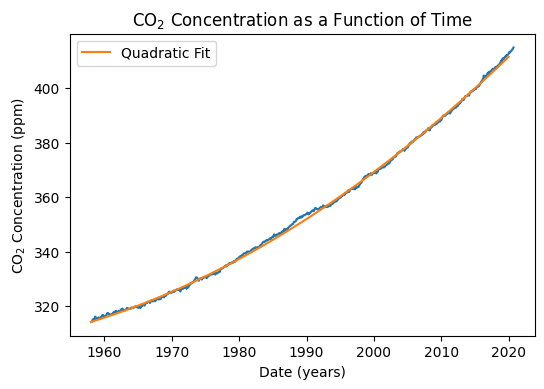

In [4]:
# Get the CO2 data
dates,data = read_co2('co2_mm_mlo.txt')
plt.plot( dates, data )

err = np.full_like(data, 1.)
a,b,c,sigma_a,sigma_b,sigma_c,chi_square = quadraticfit(dates, data, err)
    
# Plot fit
x=np.linspace(1958,2020,100)
plt.plot(x,a+b*x+c*x**2, label="Quadratic Fit")
plt.legend(loc=0)
plt.title(r"CO$_{2}$ Concentration as a Function of Time")
plt.xlabel("Date (years)")
plt.ylabel(r"CO$_{2}$ Concentration (ppm)")
plt.show()

In [5]:
#Lastly, we print the values of our constants and estimate when the atmosphere will become toxic to life
k = 50000
x_k = (-b + np.sqrt(b**2 - 4*c*(k-a))) / (2*c)

if len(data) - 3 > 0 :
    print (' a = ', a, ' +/- ', sigma_a)  
    print (' b = ', b, ' +/- ', sigma_b)
    print (' c = ', c, ' +/- ', sigma_c)
    print (' chi-square/d.o.f. = ', chi_square/(len(data)-3))
    print (' Atmosphere becomes toxic at: ', x_k)

 a =  48472.29563269877  +/-  494.7197924272325
 b =  -49.956513624486746  +/-  0.4973702505271596
 c =  0.012952484894083613  +/-  0.00012500048010362046
 chi-square/d.o.f. =  0.6079759766915436
 Atmosphere becomes toxic at:  3826.0786866744393
